In [ ]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

In [ ]:
%%capture
!wget https://www.dropbox.com/s/5deipwkmeial1ba/tr_types.csv
!wget https://www.dropbox.com/s/xwbkjwik600clsh/tr_mcc_codes.csv
!wget https://www.dropbox.com/s/qc307hdkc9jdxf8/gender_train.csv
!wget https://www.dropbox.com/s/axkihywa8q118rk/transactions.csv

In [ ]:
tr_types = pd.read_csv("tr_types.csv", sep = ';')
tr_mcc_codes = pd.read_csv("tr_mcc_codes.csv", sep = ';')
gender_train = pd.read_csv("gender_train.csv")

n = 1000000
transactions = pd.read_csv("transactions.csv", nrows=n)

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;

## Задание 1



1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'

Без использования merge!

In [ ]:
#1
types = transactions['tr_type'].sample(n=1000)
types

285468    2370
653784    7070
673058    7030
289837    2370
263650    2010
          ... 
896028    1110
333581    1030
140324    1010
114340    2010
813353    4071
Name: tr_type, Length: 1000, dtype: int64

In [ ]:
#2
all_descr_types = tr_types[tr_types['tr_type'].isin(types)]
good_descr_types = all_descr_types[(all_descr_types['tr_description'].str.contains('POS')) | (all_descr_types['tr_description'].str.contains('АТМ'))]['tr_type']

ans1 = len(types[types.isin(good_descr_types)]) / len(types)
ans1

0.659

## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
#1
tr_list = transactions.groupby('tr_type').size()
tr_list

tr_type
1000         8
1010    231117
1030    118975
1100     15476
1110    137658
         ...  
7074       505
7075        12
8100         2
8145         8
8146         3
Length: 72, dtype: int64

In [ ]:
#2
ans2 = tr_types.set_index('tr_type').loc[tr_list.nlargest(10).index[:]]
ans2

,tr_description
tr_type,
1010,Покупка. POS ТУ СБ РФ
2010,Выдача наличных в АТМ Сбербанк России
7070,Перевод на карту (с карты) через Мобильный бан...
1110,Покупка. POS ТУ Россия
1030,Оплата услуги. Банкоматы СБ РФ
2370,Списание с карты на карту по операции <перевод...
7010,Взнос наличных через АТМ (в своем тер.банке)
7030,Перевод на карту (с карты) через АТМ (в предел...
7071,Перевод на карту (с карты) через Мобильный бан...


## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
out_groups = abs(transactions[transactions['amount'] <= 0].groupby('customer_id').sum())
in_groups = transactions[transactions['amount'] >= 0].groupby('customer_id').sum()

In [ ]:
#1
customer_in_max = in_groups.nlargest(1, 'amount')['amount'].index[0]
customer_in_max

70780820

In [ ]:
#2
customer_out_max = out_groups.nlargest(1, 'amount')['amount'].index[0]
customer_out_max

70780820

In [ ]:
#3
if customer_in_max == customer_out_max :
  ans3 = abs(out_groups.at[customer_out_max, 'amount'] - in_groups.at[customer_in_max, 'amount'])
else :
  ans3 = (abs(out_groups.at[customer_out_max, 'amount'] - in_groups.at[customer_out_max, 'amount']), 
          abs(out_groups.at[customer_in_max, 'amount'] - in_groups.at[customer_in_max, 'amount']))

ans3

1837317.979973793

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
#1
top10_tr_groups = transactions[transactions['tr_type'].isin(ans2.index.values)].groupby(['tr_type'])['amount'].agg(['mean', 'median'])
top10_tr_groups

,mean,median
tr_type,,
1010,-19784.748640,-7411.52
1030,-5320.980222,-2245.92
1100,-44061.827262,-10188.26
1110,-32119.330371,-11207.57
2010,-136077.629325,-44918.32
2370,-205418.249032,-44918.32
7010,276391.789596,112295.79
7030,86104.332909,13951.52
7070,65569.831700,11319.42


In [ ]:
#2
customers_tr_groups = transactions[transactions['customer_id'].isin([customer_in_max, customer_out_max])].groupby('tr_type').agg({'amount':['mean', 'median']})
customers_tr_groups

amount             
                 mean       median
tr_type                           
2010    -2.941056e+06 -3368873.660
2330    -2.382398e+06 -2245915.770
2370    -2.218505e+06 -2245915.770
6110     1.756293e+04    10028.010
7020     1.465129e+04    10319.985
7021     2.850067e+04    28500.670
7030     1.406196e+04     8848.910
7031     1.921036e+04    12992.620
7034     1.430648e+04    14306.480
7040     2.153833e+04    14396.320
7070     1.384821e+04     8714.150
7071     1.860057e+04    12543.440
7074     2.281159e+04     9387.930

## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
out_groups = transactions[transactions['amount'] < 0].groupby('gender')['amount'].agg(['mean'])
in_groups = transactions[transactions['amount'] > 0].groupby('gender')['amount'].agg(['mean'])

In [ ]:
#1
out_groups

,mean
gender,
0.0,-53376.917122
1.0,-86094.972042


In [ ]:
#1
ans1 = abs(out_groups.iat[0, 0] - out_groups.iat[1, 0])
ans1

32718.05492021877

In [ ]:
#2
in_groups

,mean
gender,
0.0,140984.005058
1.0,77617.434010


In [ ]:
#2
ans2 = abs(in_groups.iat[0, 0] - in_groups.iat[1, 0])
ans2

63366.57104801515

## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 транзакций для мужчин и для женщин, наименьших среди всех транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
gender0_tr =  transactions[(transactions['gender'] == 0.0) & (transactions['amount'] > 0)].groupby(['tr_type'])['amount'].agg([('max_income', 'max')])
gender0_tr.head()

,max_income
tr_type,
1010,24839.83
1100,2097006.17
1110,393035.26
1200,575551.85
1210,83644.87


In [ ]:
gender1_tr = transactions[(transactions['gender'] == 1.0) & (transactions['amount'] > 0)].groupby(['tr_type'])['amount'].agg([('max_income', 'max')])
gender1_tr.head()

,max_income
tr_type,
1010,28803.87
1100,163727.26
1110,221222.70
1200,413248.50
1210,159026.11


In [ ]:
gender0_small_tr = gender0_tr.nsmallest(10, 'max_income')
gender0_small_tr

,max_income
tr_type,
4051,1122.96
4110,2245.92
4210,2245.92
2370,2335.75
4100,5041.86
7075,6737.75
2110,22459.16
1010,24839.83
2010,44918.32


In [ ]:
gender1_small_tr = gender1_tr.nsmallest(10, 'max_income')
gender1_small_tr

,max_income
tr_type,
2020,2245.92
4110,2245.92
1010,28803.87
8100,64682.37
6000,79280.83
7041,87590.72
2010,89836.63
2110,112295.79
2370,113194.15


In [ ]:
ans = pd.merge(gender0_small_tr, gender1_small_tr, how='inner', on='tr_type').index
ans

Int64Index([4110, 2370, 2110, 1010, 2010], dtype='int64', name='tr_type')

## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

In [ ]:
#1
gender0_mcc = transactions[(transactions['gender'] == 0.0) & (transactions['amount'] < 0)].groupby(['mcc_code', 'mcc_description'], as_index=False)['amount'].sum()
gender0_mcc.head()

,mcc_code,mcc_description,amount
0,742,Ветеринарные услуги,-386207.68
1,1711,"Генеральные подрядчики по вентиляции, теплосна...",-674897.69
2,1799,"Подрядчики, специализированная торговля — нигд...",-261626.73
3,2741,Разнообразные издательства/печатное дело,-20746.42
4,3000,"Авиалинии, авиакомпании",-74431645.27


In [ ]:
#1
gender1_mcc =  transactions[(transactions['gender'] == 1.0) & (transactions['amount'] < 0)].groupby(['mcc_code', 'mcc_description'], as_index=False)['amount'].sum()
gender1_mcc.head()

,mcc_code,mcc_description,amount
0,742,Ветеринарные услуги,-132277.93
1,1711,"Генеральные подрядчики по вентиляции, теплосна...",-206264.90
2,1731,Подрядчики по электричеству,-121542.67
3,1799,"Подрядчики, специализированная торговля — нигд...",-1129257.68
4,2741,Разнообразные издательства/печатное дело,-221290.08


In [ ]:
#2
diff = pd.merge(gender1_mcc, gender0_mcc, how='inner', on=['mcc_code', 'mcc_description'])
diff['difference'] = abs(diff['amount_x'] - diff['amount_y'])
diff

,mcc_code,mcc_description,amount_x,amount_y,difference
0,742,Ветеринарные услуги,-132277.93,-386207.68,253929.75
1,1711,"Генеральные подрядчики по вентиляции, теплосна...",-206264.90,-674897.69,468632.79
2,1799,"Подрядчики, специализированная торговля — нигд...",-1129257.68,-261626.73,867630.95
3,2741,Разнообразные издательства/печатное дело,-221290.08,-20746.42,200543.66
4,3000,"Авиалинии, авиакомпании",-97954225.73,-74431645.27,23522580.46
...,...,...,...,...,...
163,8699,"Организации, членства, нигде ранее не классифи...",-444183.07,-521107.48,76924.41
164,8999,"Профессиональные услуги, нигде ранее не класси...",-28643346.63,-19432057.92,9211288.71
165,9222,Штрафы,-988205.17,-361143.24,627061.93
166,9311,Налоговые платежи,-373271.22,-406197.45,32926.23


In [ ]:
#2
top10 = diff.nlargest(10, 'difference')[['mcc_code', 'mcc_description', 'difference']]
top10

,mcc_code,mcc_description,difference
116,6011,Финансовые институты — снятие наличности автом...,3.085862e+09
21,4829,Денежные переводы,2.499153e+09
115,6010,Финансовые институты — снятие наличности вручную,2.208580e+08
62,5541,Станции техобслуживания,1.554326e+08
59,5511,"Легковой и грузовой транспорт — продажа, серви...",7.352877e+07
85,5812,"Места общественного питания, рестораны",7.037856e+07
108,5977,Магазины косметики,4.241762e+07
61,5533,Автозапчасти и аксессуары,4.233808e+07
148,7995,Транзакции по азартным играм,4.079564e+07
71,5661,Обувные магазины,3.815470e+07


## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов. 

In [ ]:
#1
import re

In [ ]:
#1
tr_copy = transactions.copy()
tr_copy['tr_hour'] = tr_copy.apply(lambda r: int(re.search(' (..):', r.tr_datetime).group(1)), axis=1)
tr_copy

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_hour
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,10
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,7
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,14
...,...,...,...,...,...,...,...,...,...,...
999579,36837532,18 23:38:60,3000,6000,1297824.89,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,23
999580,6808459,206 19:00:10,3000,6000,124693.24,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,19
999581,83759123,90 22:40:57,3000,6000,218976.79,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,22
999582,89619970,104 23:39:35,3000,6000,408307.49,NaN,NaN,"Авиалинии, авиакомпании",Возврат покупки. ТУ СБ РФ,23


In [ ]:
#2
tr_copy[(tr_copy['amount'] < 0) & (tr_copy['tr_hour'] <= 5)].groupby('gender').size()

gender
0.0    38827
1.0    43017
dtype: int64

## Защита

1. Найдите среднее количество транзакций с amount<0 каждые 30 минут каждого дня. 
2. Постройте график для последних 100 дней. На графике выделите отдельно представителей разных полов.

In [ ]:
#1
tr_copy = transactions[transactions['amount'] < 0].copy()
tr_copy.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ


In [ ]:
#1
tr_copy['tr_day'] = tr_copy.apply(lambda r: int(re.search('(.+?) ', r.tr_datetime).group(1)), axis=1)

def condition(r):
  time = str(re.search(' (..:..:..)', r.tr_datetime).group(1))
  round_time = pd.to_timedelta(str(r.tr_day) + 'days' + time).floor('30min')
  return round_time

tr_copy['time'] = tr_copy.apply(lambda r: condition(r), axis=1)
tr_copy.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,gender,mcc_description,tr_description,tr_day,time
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,0,0 days 10:00:00
1,39026145,6 07:08:31,4814,1030,-5614.79,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,6,6 days 07:00:00
2,39026145,8 07:06:10,4814,1030,-1122.96,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,8,8 days 07:00:00
3,39026145,11 08:49:03,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,11 days 08:30:00
4,39026145,11 14:12:08,4814,1030,-2245.92,NaN,1.0,"Звонки с использованием телефонов, считывающих...",Оплата услуги. Банкоматы СБ РФ,11,11 days 14:00:00


In [ ]:
#1
tr_datetime_data = tr_copy.groupby(['time'], as_index=False).size()
tr_datetime_data

,time,size
0,0 days 00:00:00,244
1,0 days 00:30:00,2
2,0 days 01:00:00,3
3,0 days 01:30:00,6
4,0 days 02:00:00,5
...,...,...
21815,456 days 21:30:00,14
21816,456 days 22:00:00,16
21817,456 days 22:30:00,16
21818,456 days 23:00:00,12


In [ ]:
#2
graph_gender0_data = tr_copy[(tr_copy['gender'] == 0.0) & (tr_copy['tr_day'] >= np.max(tr_copy['tr_day']) - 100)].groupby(['time']).size()
graph_gender0_data.head()

time
356 days 00:00:00    57
356 days 01:30:00     1
356 days 02:00:00     2
356 days 03:00:00     1
356 days 03:30:00     1
dtype: int64

In [ ]:
#2
graph_gender1_data = tr_copy[(tr_copy['gender'] == 1.0) & (tr_copy['tr_day'] >= np.max(tr_copy['tr_day']) - 100)].groupby(['time']).size()
graph_gender1_data.head()

time
356 days 00:00:00    80
356 days 01:00:00     1
356 days 01:30:00     1
356 days 02:30:00     1
356 days 04:00:00     1
dtype: int64

In [ ]:
#2
import matplotlib.pyplot as plt

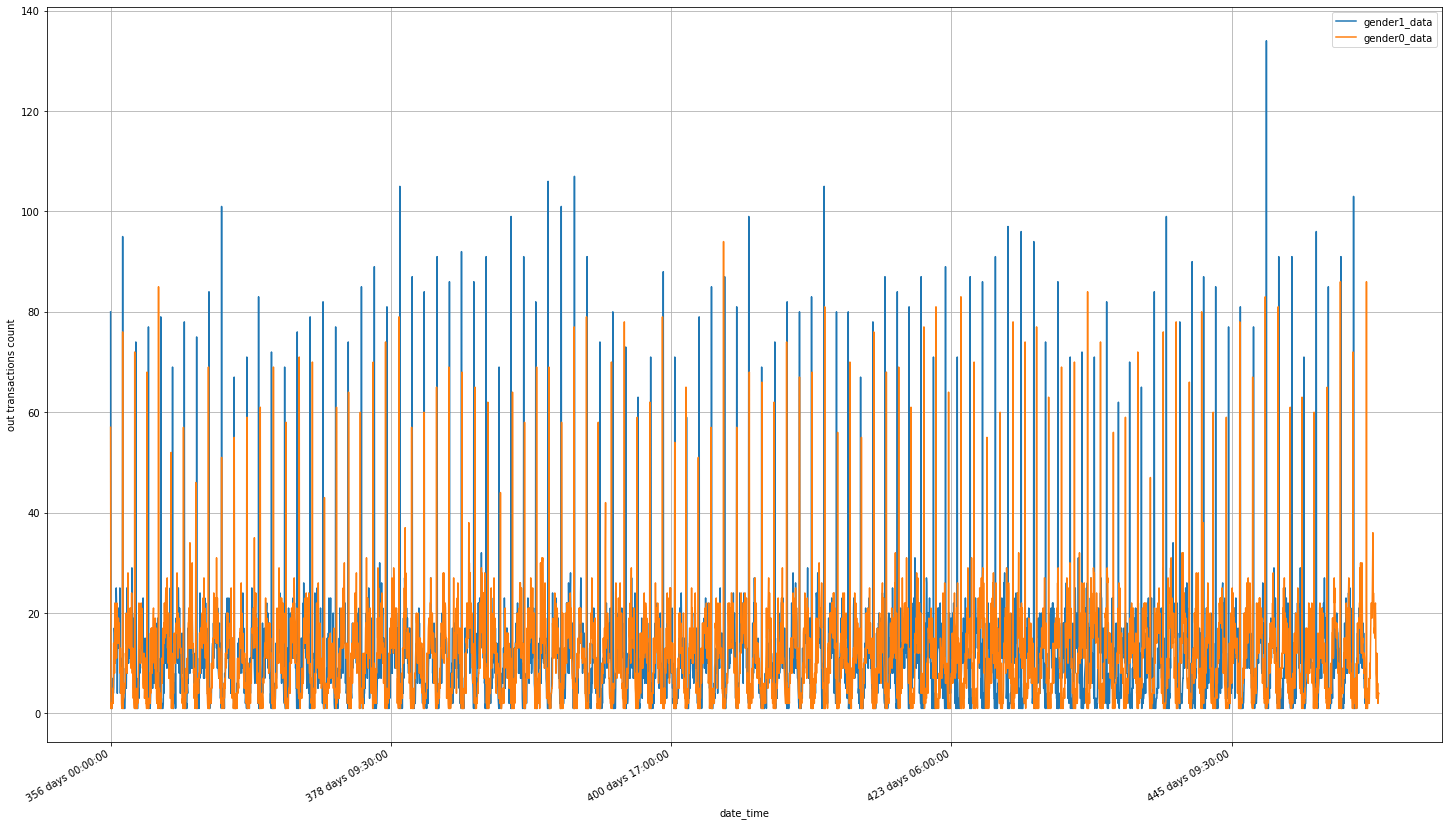

In [ ]:
#2
fig, ax = plt.subplots()

graph_gender1_data.plot(figsize=(25, 15))
graph_gender0_data.plot(figsize=(25, 15), grid=True, ylabel = 'out transactions count', xlabel='date_time')

ax.legend(['gender1_data', 'gender0_data']);